In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_pickle('saved_df.pkl')

In [4]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.shape

(707, 9)

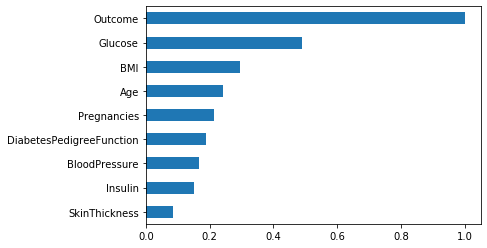

In [8]:
df.corr()['Outcome'].sort_values().plot.barh();

In [9]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Logistic Regression Model sonucu boyleydi**

In [10]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[122,  24],
       [ 31,  36]], dtype=int64)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



**KNN devam**

In [12]:
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
74,1,79,75,30,0,32.0,0.396,22
13,1,189,60,23,846,30.1,0.398,59
401,6,137,61,0,0,24.2,0.151,55


In [13]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,3.696356,121.362348,72.536437,21.216599,83.748988,32.447571,0.474142,33.172065
std,3.087124,29.868887,11.833432,15.186990,116.644576,6.743599,0.339204,11.731303
min,0.000000,56.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.800000,0.240250,24.000000
50%,3.000000,116.000000,72.000000,24.000000,46.500000,32.150000,0.372500,29.000000
75%,6.000000,140.000000,80.000000,33.000000,130.000000,36.750000,0.635500,41.000000
max,12.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,67.000000


In [ ]:
# Scale gerekiyor   -  sadece X scale edilir. y scale edilmez.

In [14]:
sc = StandardScaler()                 # scale X'in tamami veya x_train'den yapilabilr. X_train tercih edilmis.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
a = pd.DataFrame(X_train, columns = X.columns)

In [16]:
a.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.874306,-1.419714,0.208398,0.578937,-0.718712,-0.066437,-0.230602,-0.953295
1,-0.874306,2.266781,-1.060482,0.117549,6.541442,-0.348471,-0.224700,2.203857
2,0.746967,0.524074,-0.975890,-1.398441,-0.718712,-1.224262,-0.953614,1.862543


In [18]:
knn_model= KNeighborsClassifier().fit(X_train, y_train)

In [19]:
y_pred= knn_model.predict(X_test)
confusion_matrix(y_test, y_pred) ## sonuc kotu
# default k=5, p=2 secilmisti

array([[122,  24],
       [ 31,  36]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



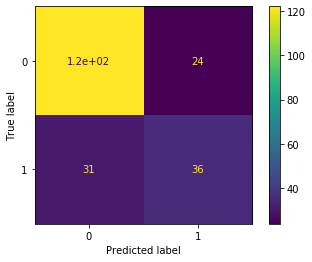

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test);

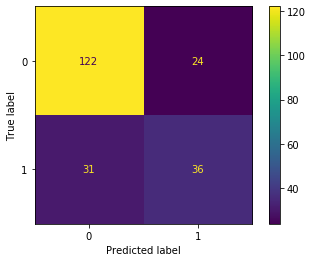

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test, values_format= ".3g");

**Model Tuning**

In [ ]:
# Lasso ve Ridge'den farkli olarak GridSearchCV ile Cross Validation ypacagiz. 
# ML"in butun algoritmalarinda gridSearch kullanilir.

In [ ]:
# knn_model ogrenmis oldugu icin knn isimli yeni model tanimliyoruz

In [28]:
knn = KNeighborsClassifier()

In [29]:
np.arange(1, 50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [30]:
knn_params = {'n_neighbors' : np.arange(1, 50)}

In [31]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [32]:
knn_cv_model.best_params_

{'n_neighbors': 13}

In [33]:
knn_tuned = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)

In [34]:
y_pred = knn_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.65      0.48      0.55        67

    accuracy                           0.76       213
   macro avg       0.72      0.68      0.69       213
weighted avg       0.74      0.76      0.74       213



In [ ]:
# GridSearch with recall

In [39]:
knn_cv_model = GridSearchCV(knn, knn_params, scoring = 'recall', cv=10).fit(X_train, y_train)

In [40]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [41]:
knn_tuned_2 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

In [42]:
y_pred = knn_tuned_2.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       146
           1       0.56      0.57      0.56        67

    accuracy                           0.72       213
   macro avg       0.68      0.68      0.68       213
weighted avg       0.72      0.72      0.72       213



**Model Deployment**

In [ ]:
# logistic  regression daha iyi sonuc verdigi icin onu save edip deploy edecegiz

In [43]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



In [ ]:
# saving the model

In [44]:
import pickle
pickle.dump(log_model, open('my_model', 'wb'))

In [ ]:
# save ettigimi read yapiyorum - aciyorum

In [45]:
model = pickle.load(open('my_model', 'rb'))

In [ ]:
# predictions with the saved model

In [46]:
prediction = model.predict(X)

In [47]:
prediction[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df['pred'] = prediction
#veya
#df["Pred"]=model.predict(X)

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [51]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred
203,2,99,70,16,44,20.4,0.235,27,0,0
144,4,154,62,31,284,32.8,0.237,23,0,0
625,4,90,88,47,54,37.7,0.362,29,0,0
140,3,128,78,0,0,21.1,0.268,55,0,0
580,0,151,90,46,0,42.1,0.371,21,1,0
542,10,90,85,32,0,34.9,0.825,56,1,1
285,7,136,74,26,135,26.0,0.647,51,0,1
414,0,138,60,35,167,34.6,0.534,21,1,0
225,1,87,78,27,32,34.6,0.101,22,0,0
462,8,74,70,40,49,35.3,0.705,39,0,0


In [54]:
pred_prob = model.predict_proba(X)

In [56]:
pred_prob[:5][:,1]

array([0.67571132, 0.07707692, 0.88504848, 0.05970744, 0.99335047])

In [57]:
df["Prob"]=pred_prob[:,1]

In [58]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,Prob
559,11,85,74,0,0,30.1,0.300,35,0,0,0.355827
216,5,109,62,41,129,35.8,0.514,25,1,0,0.444283
253,0,86,68,32,0,35.8,0.238,25,0,0,0.080814
42,7,106,92,18,0,22.7,0.235,48,0,0,0.100376
384,1,125,70,24,110,24.3,0.221,25,0,0,0.104022
279,2,108,62,10,278,25.3,0.881,22,0,0,0.384946
312,2,155,74,17,96,26.6,0.433,27,1,0,0.342748
161,7,102,74,40,105,37.2,0.204,45,0,0,0.231647
97,1,71,48,18,76,20.4,0.323,22,0,0,0.064951
567,6,92,62,32,126,32.0,0.085,46,0,0,0.133598


In [59]:
# prediction for a single patient

In [60]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [61]:
my_dict={'Pregnancies':10, 
        'Glucose':180, 
        'BloodPressure':70,
        'SkinThickness':30,
        'Insulin':50,
        'BMI':38, 
        'DiabetesPedigreeFunction':0.15,
        'Age':50}

In [62]:
df_sample=pd.DataFrame([my_dict])

In [63]:
df_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,180,70,30,50,38,0.15,50


In [64]:
single_pred=model.predict(df_sample)

In [65]:
print(single_pred)

[1]


In [66]:
single_pred_prob=model.predict_proba(df_sample)

In [67]:
print(single_pred_prob[:,1])

[0.7927357]
